In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = os.path.join('Titanic.csv')

df = pd.read_csv(data_path)

In [3]:
# Head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. SANITY CHECKS**

In [4]:
df = df[["Survived","Pclass","Sex","Age","Fare","Name","SibSp","Parch","Cabin","Embarked"]]

1.1 **Basic Structure**

- **shape**

In [5]:
# Shape of the dataset
df.shape

(891, 10)

- **Info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Name      891 non-null    object 
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


- **Describe**

In [7]:
df.describe()

,Survived,Pclass,Age,Fare,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.523008,0.381594
std,0.486592,0.836071,14.526497,49.693429,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,512.329200,8.000000,6.000000


- **Unique values in each feature**

In [8]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
Fare        248
Name        891
SibSp         7
Parch         7
Cabin       147
Embarked      3
dtype: int64

1.2 **Data Quality**

- **Missing Values**

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Name          0
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

- **Duplicated Rows**

In [10]:
df.duplicated().sum()

np.int64(0)

- **Data Types**: `Numerical` and `Categorical`

In [11]:
df_num = df.select_dtypes(include=['float','int']).columns.tolist()
df_cat = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical Features: {df_num} \n")
print(f"Categorical Features: {df_cat}")

Numerical Features: ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch'] 

Categorical Features: ['Sex', 'Name', 'Cabin', 'Embarked']


1.3 **Distribution / Outliers**

- `Outlier Detection`

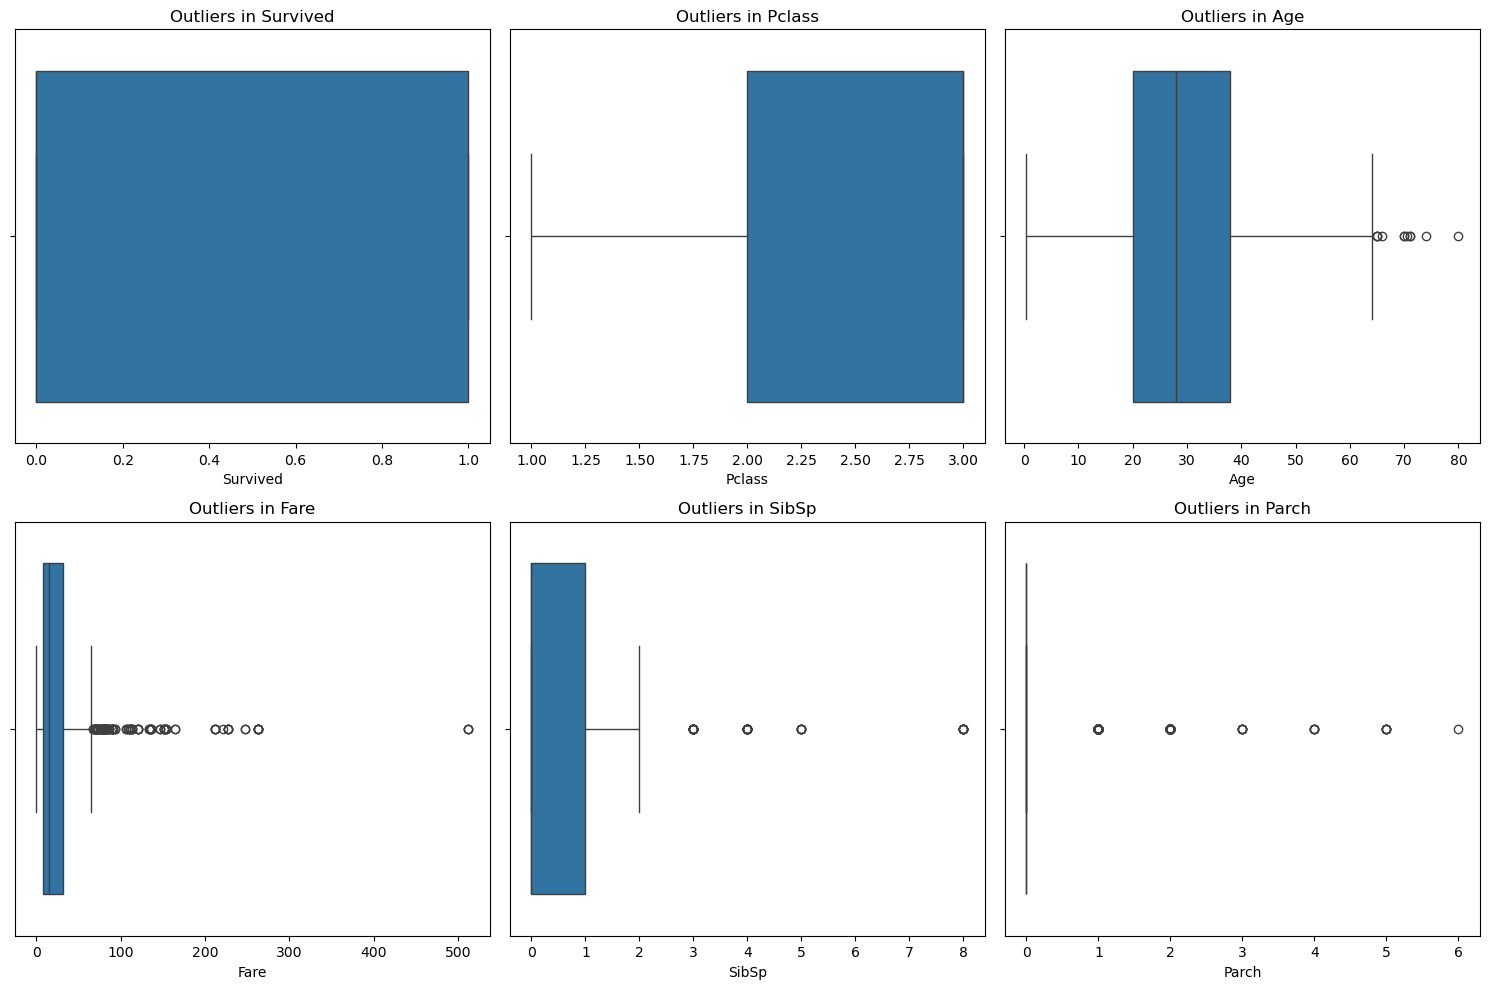

In [12]:
import math

n_cols = 3

n_rows = math.ceil(len(df_num) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*n_cols,5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()



In [13]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    outliers = series[(series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))]
    
    print(f"{series.name}: {len(outliers)} outliers")
    

detect_outliers(df["Fare"])
detect_outliers(df["Pclass"])
detect_outliers(df["Age"])

Fare: 116 outliers
Pclass: 0 outliers
Age: 11 outliers


- `Imabalance Detection`

In [14]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Count'>

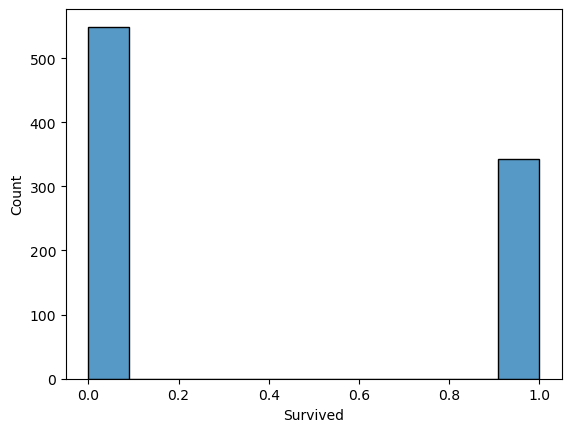

In [15]:
sns.histplot(data=df["Survived"])

**2. Data Cleaning**

- **2.1 Handling Missing Values :** `Numerical` and `Categorical`

---
**Age** (`~20%` missing)

- Use **median** (better than mean, less sensitive to outliers).


In [16]:
# Imputing Numerical Valuse with median 
df["Age"] = df["Age"].fillna(df["Age"].median()) 

**Cabin** (`~77%` missing)
- Too sparse → drop raw column.

In [17]:
df = df.drop(columns="Cabin") 

**Embarked**(`2` missing values)

**Fare**(`1` missing value)

In [18]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Fare"] = df["Fare"].fillna(df["Fare"].median())

**2.2 Drop irrelevant columns**

`Passenger Id` 

`Ticket`

**2.3 Outlier Treatment**

`Option 1`: **Keep Outliers**

When to choose:

If you’re using tree-based models (Random Forest, XGBoost, LightGBM) → they split data on thresholds and aren’t very sensitive to outliers.

If outliers are real data points (e.g., very rich Titanic passengers with high Fare).

✅ Preserves real-world variability.

❌ Outliers can still distort some evaluation metrics (like RMSE).

---
`Option 2`: **Cap/Floor Outliers** (Winsorization)

When to choose:

If you’re using linear models (Logistic Regression, Linear Regression, SVM) → these are sensitive to extreme values.

If outliers look like noise / data entry issues (not genuine).

✅ Reduces skew, makes distribution more stable.

❌ You risk losing information if outliers are meaningful.

In [19]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound  = Q1 - 1.5 * IQR
    upper_bound = Q3 +1.5 * IQR

    capped = series.clip(lower = lower_bound , upper = upper_bound)
    return capped
df["Fare_capped"] = cap_outliers(df["Fare"])

<Axes: xlabel='Fare'>

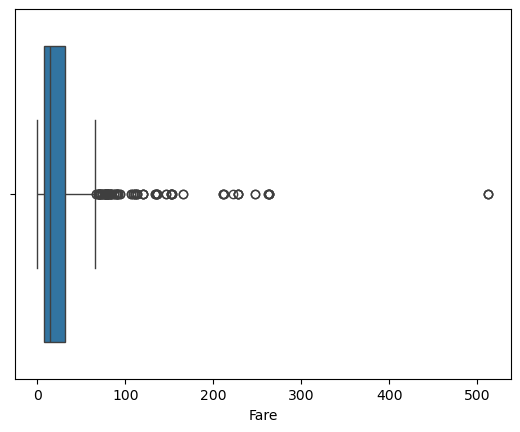

In [20]:
sns.boxplot(data=df, x="Fare")

<Axes: xlabel='Fare_capped'>

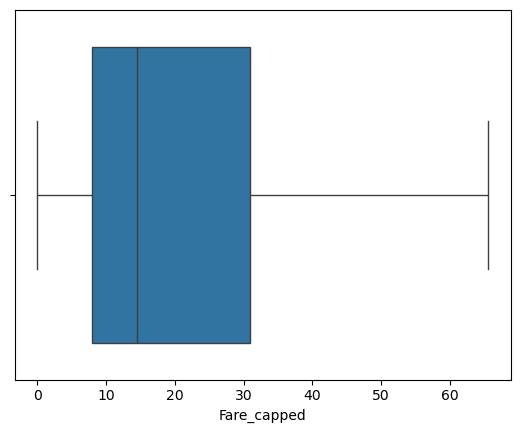

In [21]:
sns.boxplot(data=df, x="Fare_capped")

In [22]:
df_num = df.select_dtypes(include=['float','int']).columns.tolist()
df_cat = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical Features: {df_num} \n")
print(f"Categorical Features: {df_cat}")

Numerical Features: ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Fare_capped'] 

Categorical Features: ['Sex', 'Name', 'Embarked']


**3. EDA (Exploratory Data Analysis)**

**3.1 Univariate Analysis**

Goal: Understand each feature independently.

 - Numerical: histograms, KDE plots, boxplots (Age, Fare, SibSp, Parch).

 - Categorical: countplots (Sex, Pclass, Embarked, Title, Deck).

 - Look for class imbalance in Survived.

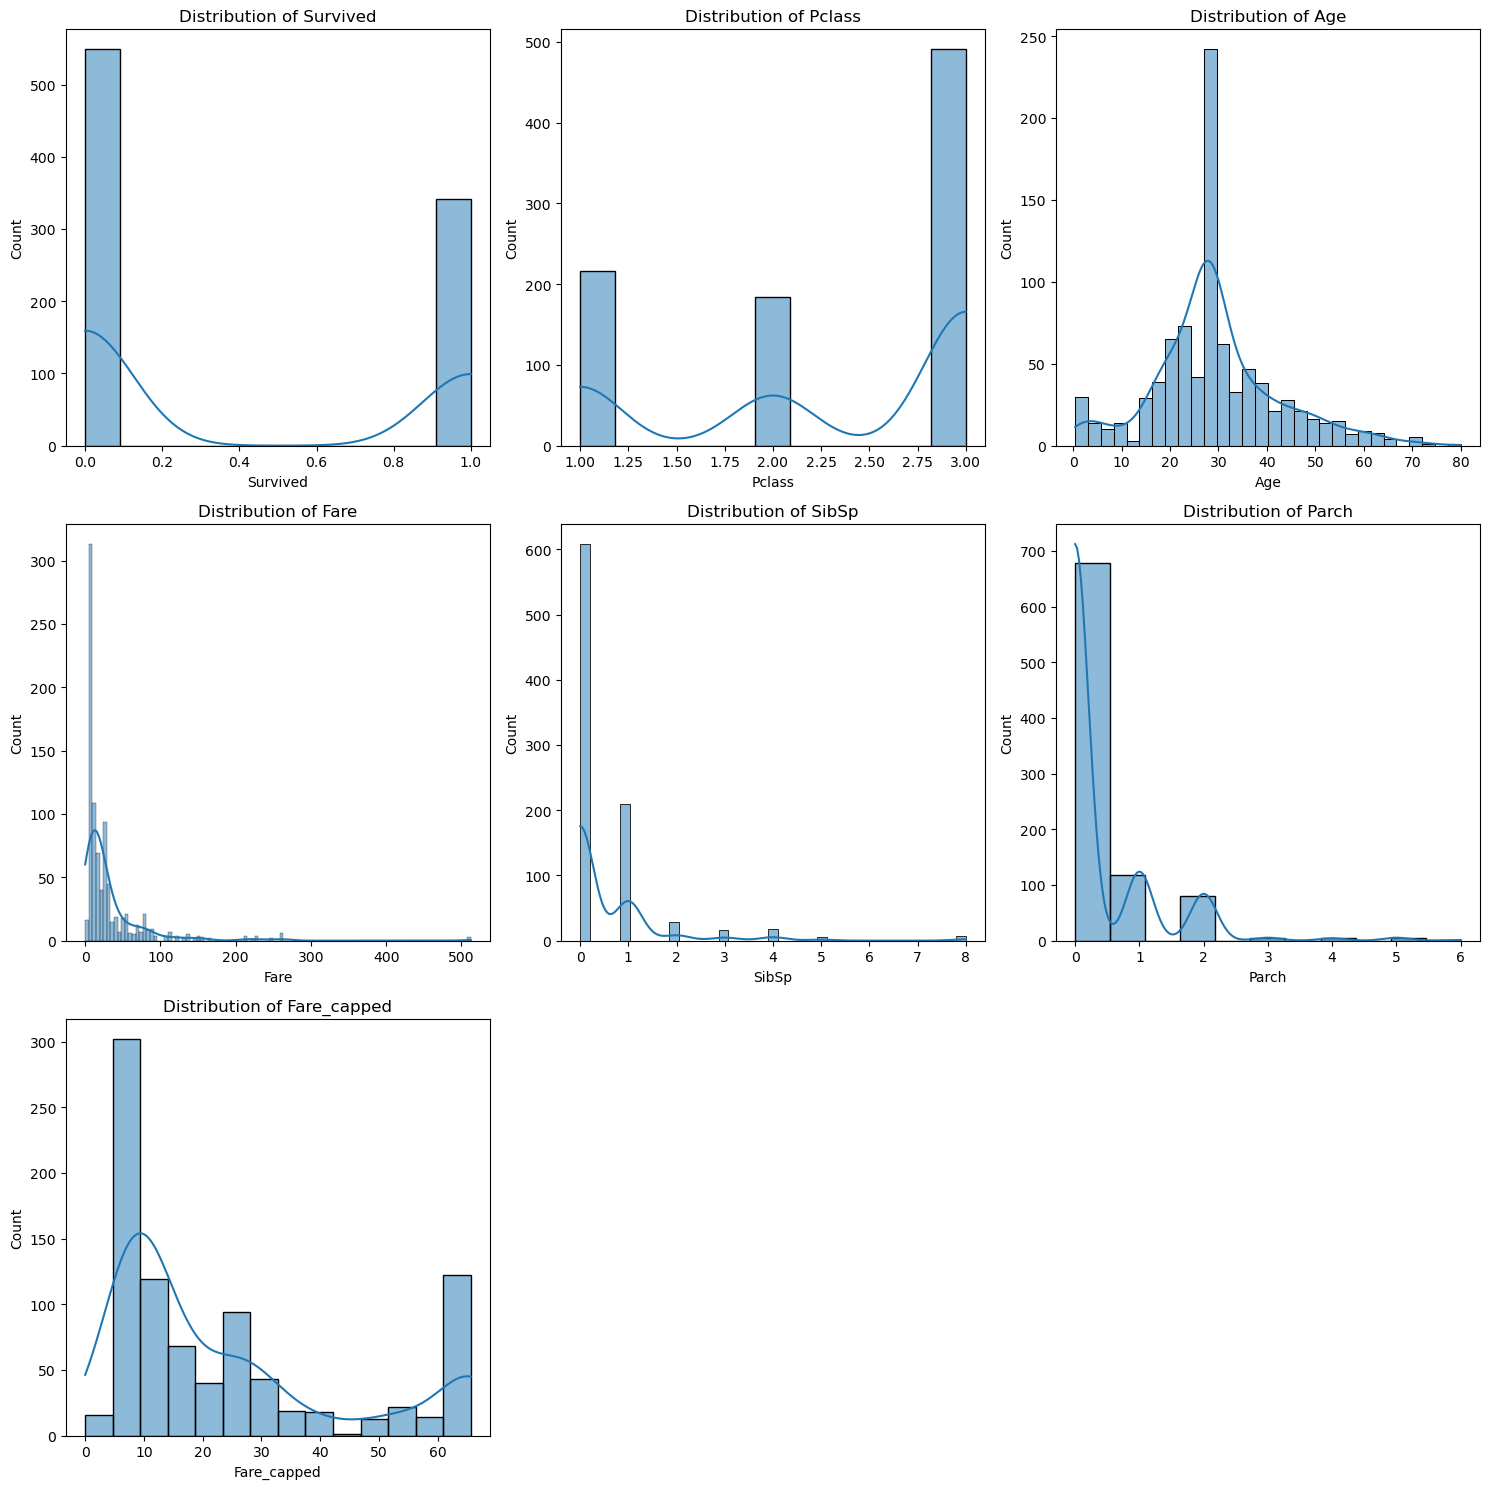

In [23]:
n_cols = 3

n_rows = math.ceil( len(df_num) / n_cols)

fig, axes = plt.subplots(
    n_rows, 
    n_cols,
    figsize=(5*n_cols, 5*n_rows)
)
axes = axes.flatten()

for i ,col in enumerate(df_num):
    sns.histplot(data=df, x=col,kde=True ,ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

*Distribution Insights*

Survived: `Imbalanced target` → more deaths `(~62%)` than survivors `(~38%)`.

Pclass: `Majority in 3rd class`; survival likely linked to class.

Age: Right-skewed, median ~28 years; outliers at very young and very old.

Fare: `Strongly right-skewed`; most fares <50, with some extreme high values. `Consider Log transform`

SibSp & Parch: Most passengers traveled alone (0), only a few had large families → potential for a derived feature like FamilySize.

**3.2 Bivariate Analysis**

Goal: Explore the relationship between features and the target variable Survived.

- **Categorical vs Categorical**:  
    - **Plots** : Countplot (with hue), Heatmap (from crosstab), Clustered Bar Chart, Mosaic Plot  
    > Used to compare frequencies or proportions between two categorical features (e.g., Sex vs Embarked).  


<Axes: xlabel='Embarked', ylabel='count'>

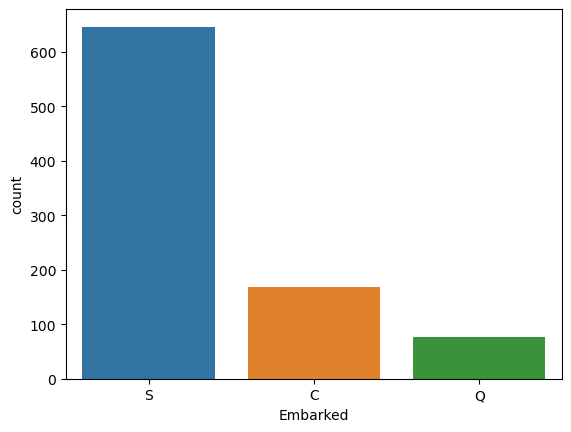

In [24]:
sns.countplot(data=df, x="Embarked", hue="Embarked")

- **Numerical vs Numerical**:  
    - **Plots** : Scatterplot, Pairplot, Correlation Heatmap, Regression Plot  
    > Useful for identifying correlations, trends, and linear/non-linear relationships between numeric features.  


<Axes: xlabel='Age', ylabel='Fare'>

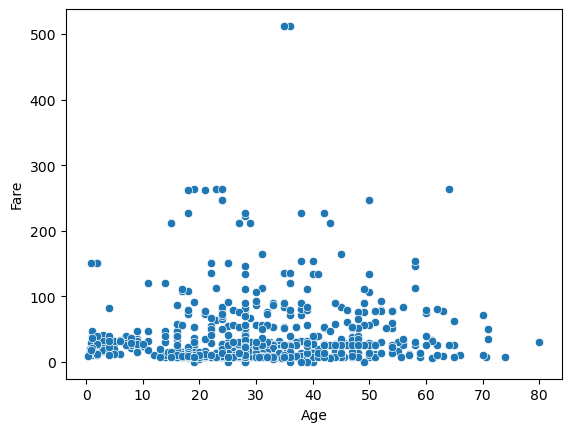

In [25]:
sns.scatterplot(data=df,x="Age", y="Fare")

- **Categorical vs Numerical**:  
    - **Plots** : Boxplot, Violinplot, Stripplot, Barplot (with y=numeric)  
    > Helps compare numerical distributions across different categories (e.g., Age vs Pclass, Fare vs Embarked).  

<Axes: xlabel='Sex', ylabel='Fare'>

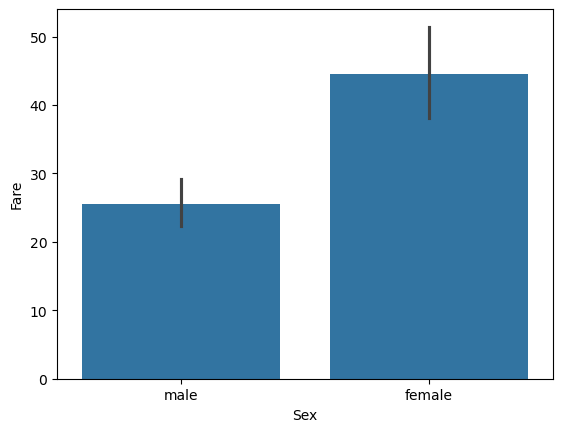

In [26]:
sns.barplot(data=df,x="Sex", y="Fare")

**4. Feature Engineering**

Extract Titles from Names

In [27]:
import re
df["Title"] = df["Name"].str.extract(r",\s([^\.]+)\.")

In [28]:
df["Title"].nunique()


17

Create a new feature family_size with number of `siblings or spouse` with passenger + `Number of parents` or children with passenger + `1`(passenger themselves) 

In [29]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

New Feature if the passenger is travelling `Alone` 

In [30]:
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

**5. Feature Selection**

In [31]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Name,SibSp,Parch,Embarked,Fare_capped,Title,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,"Braund, Mr. Owen Harris",1,0,S,7.2500,Mr,2,0
1,1,1,female,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,C,65.6344,Mrs,2,0


In [32]:
df = df[["Survived","Pclass","Sex","Age","Embarked","Fare_capped","Title","FamilySize","IsAlone"]]

*Why these features?*

Strong predictors : Sex, Pclass, Fare_capped, Age

Social context    : Title, Embarked

Family context    : FamilySize, IsAlone

Removed noise     : dropped PassengerId, Ticket, raw Name, raw Cabin (too sparse, too many uniques).

In [33]:
df_num = df.select_dtypes(include=['float','int']).columns.tolist()
df_cat = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical Features: {df_num} \n")
print(f"Categorical Features: {df_cat}")

Numerical Features: ['Survived', 'Pclass', 'Age', 'Fare_capped', 'FamilySize', 'IsAlone'] 

Categorical Features: ['Sex', 'Embarked', 'Title']


<Axes: >

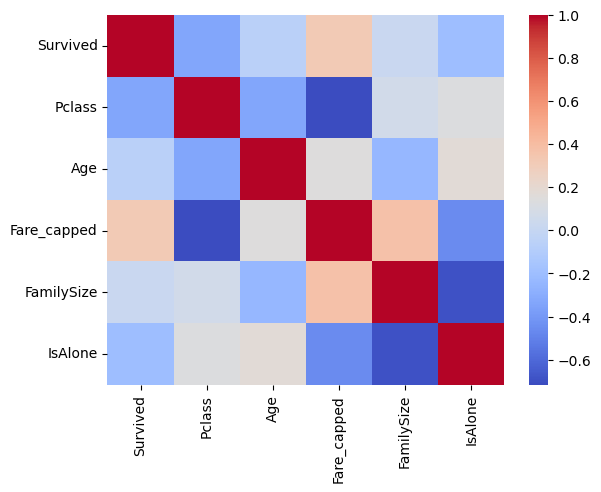

In [34]:
sns.heatmap(data=df[df_num].corr(), cmap='coolwarm')

**6. Data Splitting**

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Survived")
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    random_state=42,
    test_size=0.2,
    stratify=y
)


**7. Pre-Processing**

Encoding: one-hot, label encoding, embeddings.

Scaling: StandardScaler, MinMax, Robust (fit only on train).

Pipelines in sklearn or feature stores in production ensure consistency.

In [36]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# scaler = StandardScaler()
# X_train[df_num] = scaler.fit_transform(X_train[df_num])
# X_test[df_num] = scaler.transform(X_test(df_num))

# encoder = OneHotEncoder
# X_train_en = pd.DataFrame(
#     encoder.fit_transform(X_train[df_cat]),
#     columns = encoder.get_feature_names_out(df_cat),
#     index=X_train.index
# )

# X_test_en = pd.DataFrame(
#     encoder.transform(X_test[df_cat]),
#     columns=encoder.get_feature_names_out(df_cat),
#     index= X_test.index
# )

# X_train = pd.concat([X_train.drop(columns=df_cat), X_train_en], axis=1)
# X_test = pd.concat([X_test.drop(columns=df_cat), X_test_en], axis=1)


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

if "Survived" in df_num:
    df_num.remove("Survived")

preprocessor = ColumnTransformer(
    transformers=[
    ("num", StandardScaler(),df_num),
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'),df_cat)
])



In [38]:
print(df_num)

['Pclass', 'Age', 'Fare_capped', 'FamilySize', 'IsAlone']


**8. Modeling**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model", RandomForestClassifier(max_depth=100,class_weight='balanced',random_state=42))
    ]
)

rfc.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
rfc_pred = rfc.predict(X_test)

c:\Users\HP\anaconda3\envs\titanic_env\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [42]:
from xgboost import XGBClassifier

xgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", XGBClassifier(
            learning_rate = 0.05,
            n_estimators = 100,
            max_depth=5,
            random_stat = 42,
            eval_metric="logloss",
            subsample=0.8,
            
        ))
    ]
)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

c:\Users\HP\anaconda3\envs\titanic_env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:09] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "random_stat" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\anaconda3\envs\titanic_env\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**9. Evaluation**

In [43]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

